Phillippines, Japan and Singapore seem to have the highest level of educational attainment on Post Secondary .
While Cambodia, Thailand and Vietnam which are more underdeveloped have the highest projections on Incomplete Primary School.

From the early school leavers chart from primary education it can be seen that there are much higher numbers for the East Asia & Pacific comparing with the rest of the World.

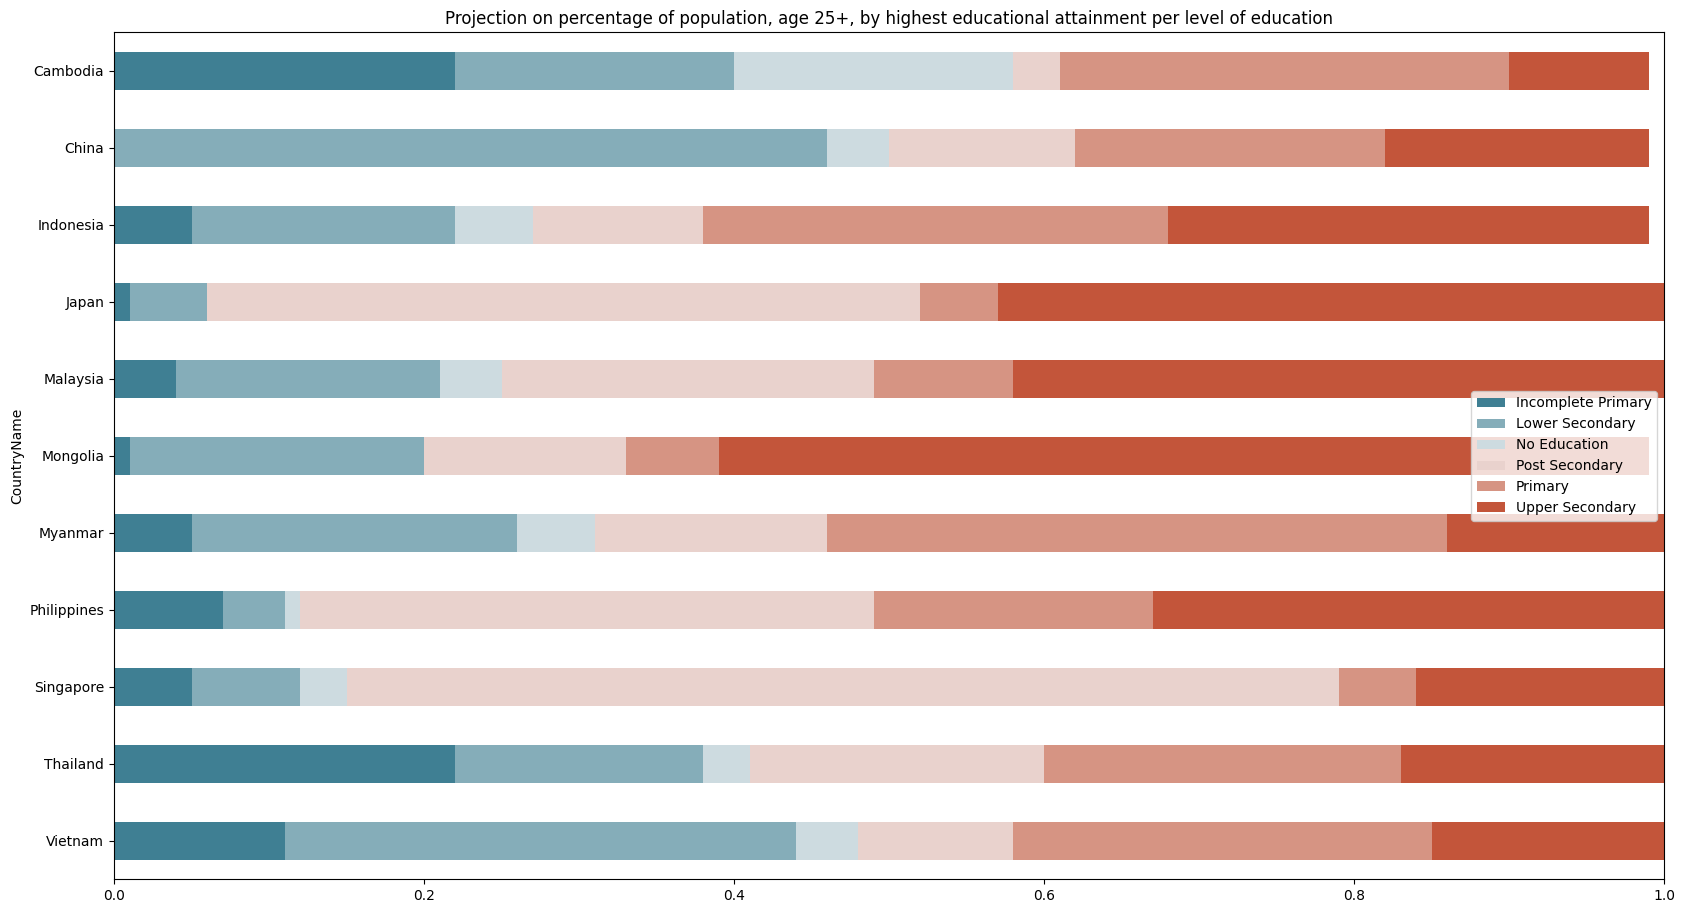

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
from scipy.stats.stats import pearsonr
import squarify

countries_macro = ['World', 'East Asia & Pacific']
# Read original file
total=pd.read_csv('../input/south-asia-pacific/total.csv')

############## Projection table for percentage of population that has completed the level of education defined by the indicator
educational_attnmnt = total[total['IndicatorName'].str.contains('Wittgenstein Projection: Percentage of the population age 25\+ by') & total['IndicatorName'].str.contains('Total') & ~total['CountryName'].isin(countries_macro)]

educational_attnmnt_pt=pd.pivot_table(educational_attnmnt, index='CountryName', columns='IndicatorName', values=['2025'], dropna=True)

educational_attnmnt_pt['sum'] = educational_attnmnt_pt.sum(axis=1)
educational_attnmnt_pt = educational_attnmnt_pt[educational_attnmnt_pt['sum']!=0]

educational_attnmnt_pt=educational_attnmnt_pt.drop('sum',axis=1)

# Bar plots for all education levels per each country
educational_attnmnt_pt=educational_attnmnt_pt[::-1]
pal=sns.diverging_palette(220, 20, as_cmap=True)
educational_graph=educational_attnmnt_pt.plot(kind='barh', stacked=True, figsize=(20,11), colormap=pal, title='Projection on percentage of population, age 25+, by highest educational attainment per level of education', legend=True, xlim=(0,1))
plt.legend(labels=['Incomplete Primary', 'Lower Secondary', 'No Education', 'Post Secondary', 'Primary', 'Upper Secondary'], loc='center right')
plt.show()

If we analyze a little bit deeper into some other indicators. We can deduce that this higher number of early school leavers should be reflected in the literacy rate of the East Asia Pacific population being compared with the world wide.
So, it seems that even though the trend is pretty similar for both the World and our region, our assumptions are true the literacy rate is reduced.

What is very interesting on these two charts the plot the literacy rates is that in the period between 2003-2006 there was a drastic increase felt world wide.
This could be a result combined by the spreading of Internet and PC usage. Moreover, at the time, the fast development of online information sources inevitably impacted these figures.

In the Unemployment and GDP per capita charts we can see a strong correlation between the two variables, for example on Thailand's figure that unemployment is in the bottom 5 chart way down the Y axis while it's GDP per capita is in the Top 5 countries around the region.


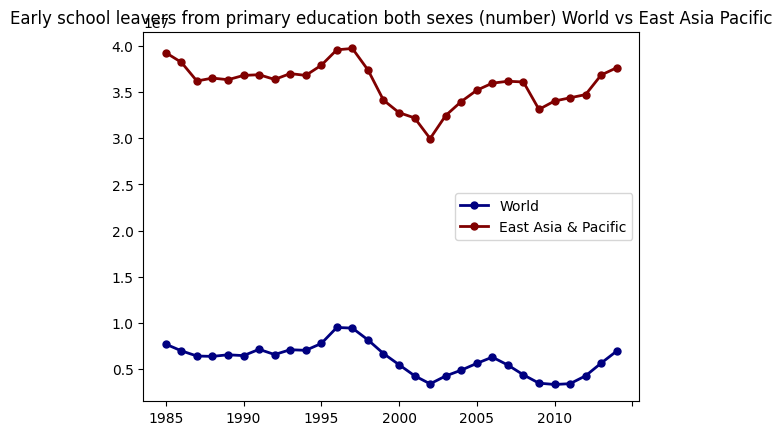

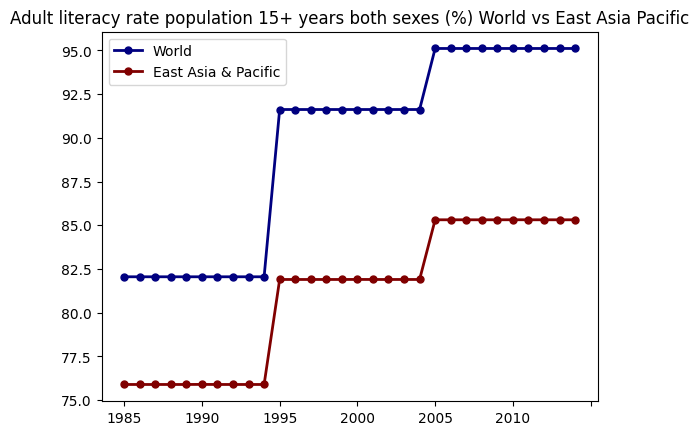

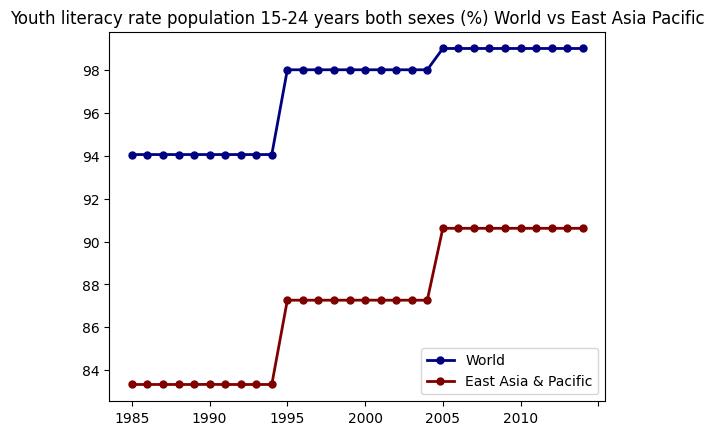

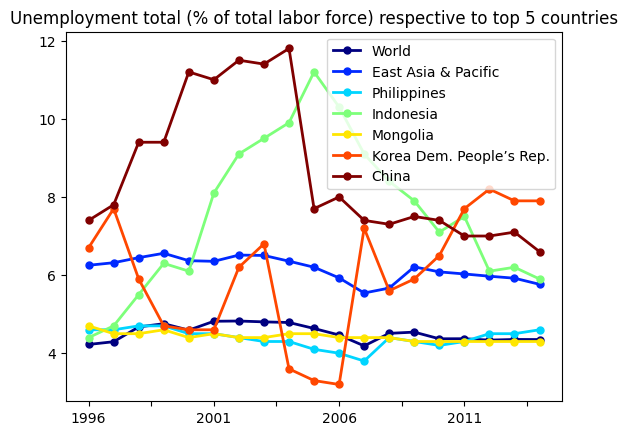

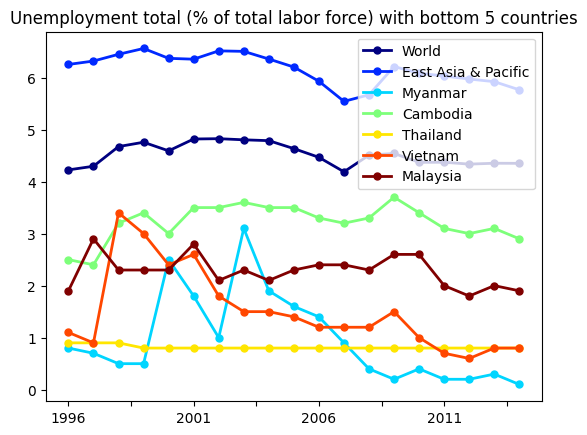

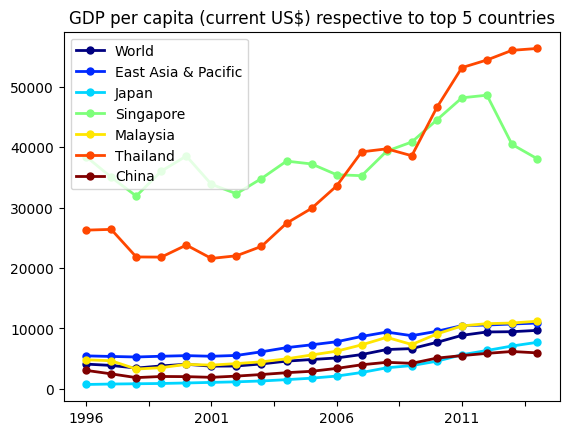

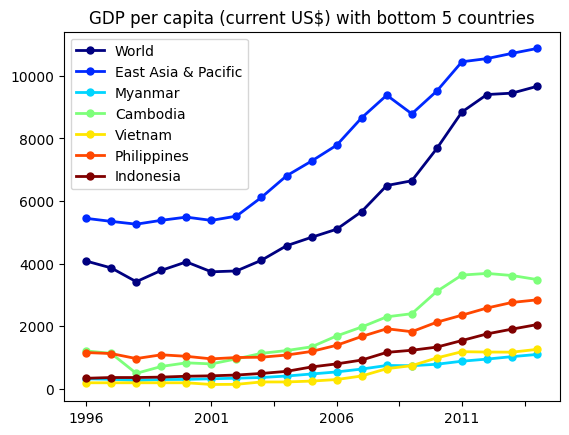

In [3]:

# Evolutionary graph for GDP and GNI
import matplotlib.style as style
style.use('default')

years = list(map(lambda y: str(y), list(range(1996,2015))))

indicators = [
    "Early school leavers from primary education both sexes (number)",
    "Adult literacy rate population 15+ years both sexes (%)",
    "Youth literacy rate population 15-24 years both sexes (%)",
    "Unemployment total (% of total labor force)",
    "GDP per capita (current US$)"
]


macro_exceptions = [
    "Adult literacy rate population 15+ years both sexes (%)",
    "Youth literacy rate population 15-24 years both sexes (%)",
    "Early school leavers from primary education both sexes (number)"
]
########## Plotting list of indicators

for indicator in indicators:
    if indicator in macro_exceptions:
        years = list(map(lambda y: str(y), list(range(1985,2015))))
        world_asia = total[total['IndicatorName'].isin([indicator])]

        fig, ax = plt.subplots()
        world_asia = world_asia[world_asia['CountryName'].isin(countries_macro)]
        for c in ['CountryName', 'CountryCode', 'IndicatorName', 'Unnamed: 0']:
            del world_asia[c]
        world_asia = world_asia[years]
        world_asia = world_asia.T
        world_asia.plot(lw=2, ax=ax, colormap='jet', marker='.', markersize=10, title="{0} on World vs East Asia Pacific".format(indicator))
        ax.legend(countries_macro)
    else:
        years = list(map(lambda y: str(y), list(range(1996,2015))))
        countries = total[total['IndicatorName'].isin([indicator]) & ~total['CountryName'].isin(countries_macro)]
        top_5_countries = countries.nlargest(5, 'sum')
        bottom_5_countries = countries.nsmallest(5, 'sum')

        ## Top 5
        world_vs_asia = total[total['IndicatorName'].isin([indicator])]

        world_region_and_highest = countries_macro + top_5_countries['CountryName'].tolist()
        fig, ax = plt.subplots()
        world_vs_asia = world_vs_asia[world_vs_asia['CountryName'].isin(world_region_and_highest)]
        for c in ['CountryName', 'CountryCode', 'IndicatorName', 'Unnamed: 0']:
            del world_vs_asia[c]
        world_vs_asia = world_vs_asia[years]
        world_vs_asia = world_vs_asia.T
        world_vs_asia.plot(lw=2, ax=ax, colormap='jet', marker='.', markersize=10, title="{0} respective to top 5 countries".format(indicator))
        ax.legend(world_region_and_highest)

        ## Bottom 5
        world_vs_asia = total[total['IndicatorName'].isin([indicator])]

        world_region_and_lowest = countries_macro + bottom_5_countries['CountryName'].tolist()
        fig2, ax2 = plt.subplots()
        world_vs_asia = world_vs_asia[world_vs_asia['CountryName'].isin(world_region_and_lowest)]
        for c in ['CountryName', 'CountryCode', 'IndicatorName', 'Unnamed: 0']:
            del world_vs_asia[c]
        world_vs_asia = world_vs_asia[years]
        world_vs_asia = world_vs_asia.T
        world_vs_asia.plot(lw=2, ax=ax2, colormap='jet', marker='.', markersize=10, title="{0} with bottom 5 countries".format(indicator))
        ax2.legend(world_region_and_lowest)



On GDP Japan is the strongest. It also has a very well maintained culture of craftsmanship, watches industry, car manufacturies
while Cambodia, Myanmar, Vietnam, Indonesia are not too far away.
Although China one of the biggest producers it seems growth is not so much felt there.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


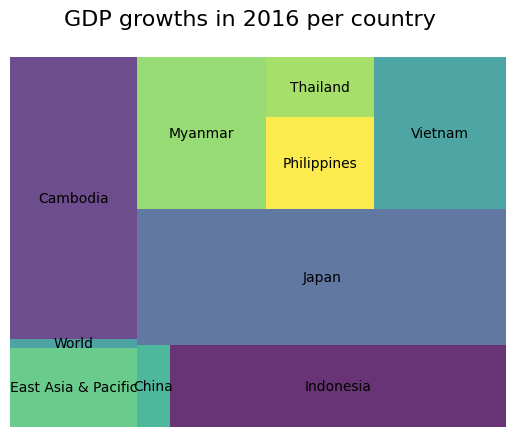

In [6]:
# Treemaps with GDP growths per countries
fig, ax = plt.subplots()
fig.suptitle('GDP growths in 2016 per country', fontsize=16)
indicator = "GDP per capita (current US$)"

df = total[total['IndicatorName'].isin([indicator])]
df['GDP growth per capita'] = (df['2016'] / df['2015'] - 1) * 100
df = df[df['GDP growth per capita'] > 0]
countries = df['CountryName'].tolist()
growths = df['GDP growth per capita'].tolist()

# Create a data frame with fake data
df_viz = pd.DataFrame({'growths':growths, 'country':countries})

# plot it
squarify.plot(sizes=df_viz['growths'], label=df_viz['country'], alpha=.8)
plt.axis('off')
plt.show() 

On the GNI indicator the leaders are both Japan and Cambodia followed by Myanmar, Vietnam, Philippines, Indonesia

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


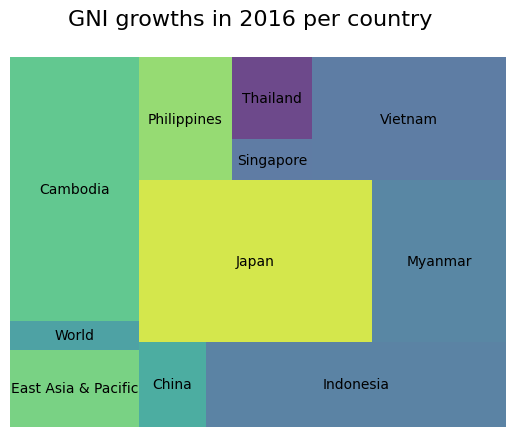

In [7]:

# Treemaps with GNI growths per countries
fig, ax = plt.subplots()
fig.suptitle('GNI growths in 2016 per country', fontsize=16)
indicator = "GNI (current US$)"

df = total[total['IndicatorName'].isin([indicator])]
df['GNI growth per capita'] = (df['2016'] / df['2015'] - 1) * 100
df = df[df['GNI growth per capita'] > 0]
countries = df['CountryName'].tolist()
growths = df['GNI growth per capita'].tolist()

# Create a data frame with fake data
df_viz = pd.DataFrame({'growths':growths, 'country':countries})

# plot it
squarify.plot(sizes=df_viz['growths'], label=df_viz['country'], alpha=.8)
plt.axis('off')
plt.show() 